In [308]:
import cv2
import numpy as np
from constants import intrinsic, distortion
img = cv2.imread("WIN_20231209_16_51_11_Pro.jpg")
# img = cv2.resize(img, (1920,1080))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
screen_corners3d = np.array([[150,-135,-40],[0,-135,-40],[0,35,-40],[150,35,-40]],dtype=np.double)

In [309]:
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_100)
params = cv2.aruco.DetectorParameters()
detector = cv2.aruco.ArucoDetector(aruco_dict, params)

In [310]:
tag_corners, tag_ids, _ = detector.detectMarkers(gray)

In [311]:
tag_size = 22.2
imgae_size = 600
corner1_3d = np.array([[0,0,0],[tag_size,0,0],[tag_size,tag_size,0],[0,tag_size,0]], dtype=np.double)
for index, tid in enumerate(tag_ids):
    if tid == 1:
        print(corner1_3d)
        print(tag_corners[index])
        _, rvec, tvec = cv2.solvePnP(corner1_3d, tag_corners[index], intrinsic, distortion)
        R, _ = cv2.Rodrigues(rvec)
        point2d, _ = cv2.projectPoints(screen_corners3d, R, tvec, intrinsic, distortion)
        pts1 = point2d.astype(np.float32)
        pts2 = np.array([[0, 0], [0, imgae_size-1], [imgae_size-1, imgae_size-1], [imgae_size-1, 0]], dtype=np.float32)
        M = cv2.getPerspectiveTransform(pts1, pts2)
        result = cv2.warpPerspective(img, M, (imgae_size, imgae_size))
        result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
cv2.imwrite("result2.jpg", result)

[[ 0.   0.   0. ]
 [22.2  0.   0. ]
 [22.2 22.2  0. ]
 [ 0.  22.2  0. ]]
[[[1122.  253.]
  [1055.  258.]
  [1049.  191.]
  [1117.  185.]]]


True

In [7]:
import camera_lib
import matplotlib.pyplot as plt
from constants import *
import cv2

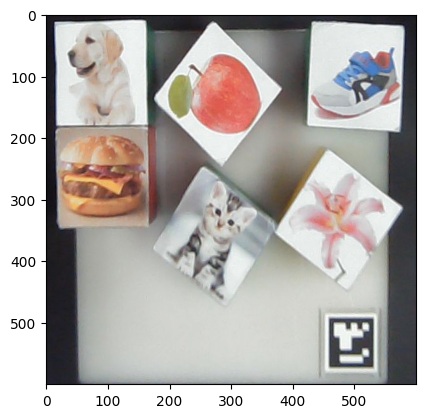

True

In [16]:
img = cv2.imread("test.jpg")
res = camera_lib.cut_image(img)
file = res
res = cv2.cvtColor(res, cv2.COLOR_RGB2BGR)
plt.imshow(res)
plt.show()

cv2.imwrite("result2.jpg", file)